
# Final Project: Part 3

_Author: Kirsten Germeraad_

---

Exoplanet Hunting in Deep Space - Kepler labelled time series data

Information about the data set from the creators:

LABEL -> 2 is an exoplanet star and 1 is a non-exoplanet-star.

FLUX1-FLUX3197 -> the light intensity recorded for each star, at a different point in time.

Data sets can be found at https://www.kaggle.com/keplersmachines/kepler-labelled-time-series-data/home

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics

from pathlib import Path

%matplotlib inline

In [132]:
#Read in the training and testing data sets & take a quick look

kepler = pd.read_csv('./kepler-labelled-time-series-data/exoTrain.csv')
kepler_test = pd.read_csv('./kepler-labelled-time-series-data/exoTest.csv')
kepler.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [133]:
#Look at column names
kepler.columns

Index(['LABEL', 'FLUX.1', 'FLUX.2', 'FLUX.3', 'FLUX.4', 'FLUX.5', 'FLUX.6',
       'FLUX.7', 'FLUX.8', 'FLUX.9',
       ...
       'FLUX.3188', 'FLUX.3189', 'FLUX.3190', 'FLUX.3191', 'FLUX.3192',
       'FLUX.3193', 'FLUX.3194', 'FLUX.3195', 'FLUX.3196', 'FLUX.3197'],
      dtype='object', length=3198)

In [135]:
#Train, test and split the training data set for use in evaluating multiple models
from sklearn.model_selection import train_test_split

#Limiting the number of rows of data being used
#Want the values to be more evenly split between stars with planets and those without
#This results in better models
feature_cols = kepler.columns[1:3197]
X = kepler.loc[0:150, feature_cols]
y = kepler.loc[0:150, 'LABEL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Logistic Regression Model

In [136]:
#Fit a logistic regression estimator
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred

array([2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2,
       2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2])

In [137]:
#Get score of the logistic regression model on the test set
logreg.score(X_test, y_test)

0.54347826086956519

In [138]:
#Get the confusion matrix for the logistic regression model
metrics.confusion_matrix(y_test, y_pred)

array([[18, 16],
       [ 5,  7]])

## Null Model

In [139]:
#Compare to null model
frequencies = y_train.value_counts().sort_values(ascending=False)
biggest_frequency = frequencies.iloc[0]
total = frequencies.sum()
null_accuracy = biggest_frequency / total
print('The null model accuracy is: ' + str(null_accuracy))

The null model accuracy is: 0.761904761905


## K-Nearest Neighbors Model

In [140]:
#Standardize features before trying K-Nearest Neighbors
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [141]:
#Try K-Nearest Neighbors with k=1
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_std, y_train)

y_pred = knn.predict(X_test_std)
metrics.accuracy_score(y_test, y_pred)

0.71739130434782605

In [142]:
#Go looking for the best number to use for k
test_scores = []

for k in range (1, 50):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_std, y_train)
    y_pred = knn.predict(X_test_std)
    test_accuracy = metrics.accuracy_score(y_test, y_pred)
    test_scores.append([k, test_accuracy])

In [143]:
test_scores

[[1, 0.71739130434782605],
 [2, 0.73913043478260865],
 [3, 0.80434782608695654],
 [4, 0.78260869565217395],
 [5, 0.80434782608695654],
 [6, 0.78260869565217395],
 [7, 0.78260869565217395],
 [8, 0.76086956521739135],
 [9, 0.76086956521739135],
 [10, 0.76086956521739135],
 [11, 0.76086956521739135],
 [12, 0.73913043478260865],
 [13, 0.73913043478260865],
 [14, 0.73913043478260865],
 [15, 0.73913043478260865],
 [16, 0.73913043478260865],
 [17, 0.73913043478260865],
 [18, 0.73913043478260865],
 [19, 0.73913043478260865],
 [20, 0.73913043478260865],
 [21, 0.73913043478260865],
 [22, 0.73913043478260865],
 [23, 0.73913043478260865],
 [24, 0.73913043478260865],
 [25, 0.73913043478260865],
 [26, 0.73913043478260865],
 [27, 0.73913043478260865],
 [28, 0.73913043478260865],
 [29, 0.73913043478260865],
 [30, 0.73913043478260865],
 [31, 0.73913043478260865],
 [32, 0.73913043478260865],
 [33, 0.73913043478260865],
 [34, 0.73913043478260865],
 [35, 0.73913043478260865],
 [36, 0.73913043478260865],
 

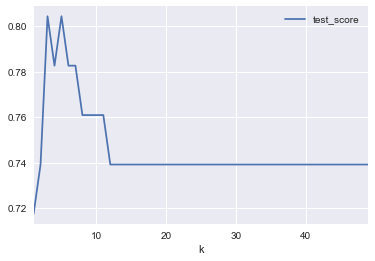

In [144]:
#Plot the resulting scores by the k-value
scores_df = pd.DataFrame(test_scores, columns=['k', 'test_score'])
ax = scores_df.plot(x='k', y='test_score')

In [145]:
#Try k=3 since that looks like a good number based on the graph
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_std, y_train)

y_pred = knn.predict(X_test_std)
metrics.accuracy_score(y_test, y_pred)

0.80434782608695654

In [146]:
#Look at the confusion matrix for k=3
metrics.confusion_matrix(y_test, y_pred)

array([[34,  0],
       [ 9,  3]])

## Decision Tree Model

In [147]:
#Building a decision tree model to compare results
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

treeclass = DecisionTreeClassifier(max_depth=None)

In [149]:
#Calculate RMSE for the model
scores = cross_val_score(treeclass, X_train, y_train, cv=20, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

0.50450153528322561

In [150]:
#Tune the model for max depth

#List of values to try:
max_depth_range = list(range(1, 20))

# List to store the average RMSE for each value of max_depth:
RMSE_scores = []

# Use LOOCV with each value of max_depth.
for depth in max_depth_range:
    treeclass = DecisionTreeClassifier(max_depth=depth)
    MSE_scores = cross_val_score(treereg, X_train, y_train, cv=20, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

In [151]:
RMSE_scores

[0.44298174847556648,
 0.42192898380683597,
 0.44298174847556648,
 0.41303997945920212,
 0.43409274412793264,
 0.41303997945920212,
 0.41303997945920212,
 0.44298174847556648,
 0.42192898380683597,
 0.41303997945920212,
 0.42192898380683597,
 0.43409274412793264,
 0.42192898380683597,
 0.43409274412793264,
 0.41303997945920212,
 0.42192898380683597,
 0.41303997945920212,
 0.42192898380683597,
 0.43409274412793264]

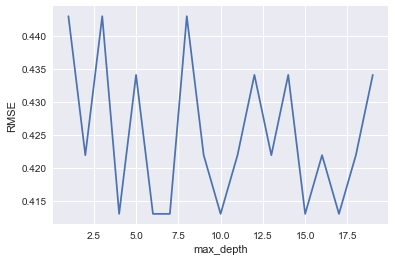

In [152]:
# Plot max_depth (x-axis) versus RMSE (y-axis).

fig, ax = plt.subplots()
ax.plot(max_depth_range, RMSE_scores);
ax.set_xlabel('max_depth');
ax.set_ylabel('RMSE');

In [153]:
# max_depth=2 looks good, so fit a tree using that parameter.
# /scrub/
treeclass = DecisionTreeClassifier(max_depth=2)

treeclass.fit(X_train, y_train)

y_pred = treeclass.predict(X_test)
test_accuracy = metrics.accuracy_score(y_test, y_pred)
print('The accuracy for the Decision Tree was: ' + str(test_accuracy))

The accuracy for the Decision Tree was: 0.891304347826


In [154]:
#Confusion matrix for the decision tree model
metrics.confusion_matrix(y_test, y_pred)

array([[33,  1],
       [ 4,  8]])

## Random Forest (aka are more trees better)

In [155]:
#Trying out a random forest now!

rand_treeclass = DecisionTreeClassifier(max_depth=None)

samples = [np.random.choice(a=500, size=500, replace=True) for _ in range(1,571)]

In [156]:
# Define testing data.
X_test = kepler_test.iloc[:, 1:]
y_test = kepler_test.iloc[:, 0]

In [157]:
# Grow one tree for each bootstrap sample and make predictions on testing data.
num = 1
test_scores = []

for sample in samples:
    X_train = kepler.iloc[sample, 1:]
    y_train = kepler.iloc[sample, 0]
    rand_treeclass.fit(X_train, y_train)
    y_pred = rand_treeclass.predict(X_test)
    test_accuracy = metrics.accuracy_score(y_test, y_pred)
    test_scores.append([num, test_accuracy])
    num = num + 1

test_scores

[[1, 0.90000000000000002],
 [2, 0.90175438596491231],
 [3, 0.91578947368421049],
 [4, 0.91578947368421049],
 [5, 0.92456140350877192],
 [6, 0.90175438596491231],
 [7, 0.88596491228070173],
 [8, 0.91578947368421049],
 [9, 0.90175438596491231],
 [10, 0.85964912280701755],
 [11, 0.87368421052631584],
 [12, 0.89824561403508774],
 [13, 0.93157894736842106],
 [14, 0.92105263157894735],
 [15, 0.91228070175438591],
 [16, 0.89122807017543859],
 [17, 0.93333333333333335],
 [18, 0.89473684210526316],
 [19, 0.88070175438596487],
 [20, 0.85438596491228069],
 [21, 0.86140350877192984],
 [22, 0.90175438596491231],
 [23, 0.90526315789473688],
 [24, 0.92982456140350878],
 [25, 0.91228070175438591],
 [26, 0.93684210526315792],
 [27, 0.90175438596491231],
 [28, 0.92982456140350878],
 [29, 0.90175438596491231],
 [30, 0.90350877192982459],
 [31, 0.85964912280701755],
 [32, 0.90000000000000002],
 [33, 0.88596491228070173],
 [34, 0.89824561403508774],
 [35, 0.87192982456140355],
 [36, 0.90526315789473688],
 

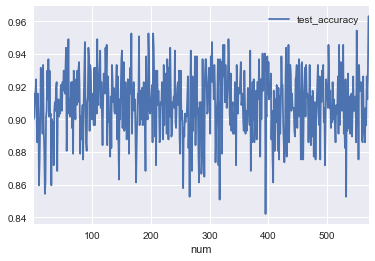

In [161]:
#Plot the resulting scores
test_scores_df = pd.DataFrame(test_scores, columns=['num', 'test_accuracy'])
ax = test_scores_df.plot(x='num', y='test_accuracy')

In [159]:
#mean of the test scores
test_scores_df.mean()

num              285.500000
test_accuracy      0.909661
dtype: float64